# Classifying sentences: part 1 clustering sentences

After the post on chatbots, I was interested in practicing more text analysis techniques like classifying text and word embeddings. I popped over to Kaggle and found a Q&A dataset (https://www.kaggle.com/quora/question-pairs-dataset). It contains question pairs that may or may not be similar.

In this post, I practice finding duplicate questions in the dataset and I cluster sentences.  Let's get started!


Check out github for the supporting python subfunctions : https://github.com/j622amilah/Classify_sentences!

<img src="main_image.png" alt="Drawing" style="width: 300px;"/>

In [1]:
%load_ext autoreload 
%autoreload 2

# Loading Data on Kaggle

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

df = pd.read_csv("/kaggle/input/question-pairs-dataset/questions.csv")

# Loading Data on PC

In [100]:
import numpy as np
import pandas as pd
import nltk

# Personal python functions
import sys
sys.path.insert(1, 'C:\\Users\\jamilah\\Documents\\Subfunctions_python')

from make_a_properlist import *
from make_a_properlist_str import *
from findall import *
from isnan import *
from pandas_fillna_percolumn import *
from pandas_rename_columns import *
from is_empty import *

from pandas_array2df import *

from string_text_processing.get_cossine_similarity import *
from string_text_processing.preprocessing import *
from string_text_processing.get_word_count_uniquewords import *
from string_text_processing.remove_chars_from_wordtoken import *
from string_text_processing.detect_numbers_from_wordtokens import *

from string_text_processing.calc_cossim_mat_of_2sen_arr import *
from string_text_processing.get_unique_sen_grpsWITHmax_MAIN import *
from string_text_processing.get_unique_sen_grpsWITHmax import *
from string_text_processing.is_sen_in_senarray import *
from string_text_processing.unique_str_arrays import *
from string_text_processing.pandas_visualize_senarr import *
from string_text_processing.unique_senarr import *
from string_text_processing.minimally_regroup_senarr2 import *

from scikit_functions import *

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("C:\\Users\\jamilah\\Documents\\Github_analysis_PROJECTS\\Text_analysis\\Classify_sentences\\questions.csv")
# df = pd.read_csv("C:\\Users\\jamilah\\Documents\\Github_analysis_PROJECTS\\Text_analysis\\Classify_sentences_by_keywords\\questions.csv", encoding = "Windows-1252")

In [11]:
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404346,404346,789792,789793,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404347,404347,789794,789795,Do you believe there is life after death?,Is it true that there is life after death?,1
404348,404348,789796,789797,What is one coin?,What's this coin?,0
404349,404349,789798,789799,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [111]:
sen1_temp = df.question1.to_numpy()
sen2_temp = df.question2.to_numpy()

# only take first 100, 200
k = 200
sen1_temp = sen1_temp[0:k]
sen2_temp = sen2_temp[0:k]
# print('sen1_temp: ', sen1_temp)

# Tokenize each sentence
sen1_ar = []
sen2_ar = []
for ind, s1 in enumerate(sen1_temp):
    sen1_ar.append(s1.split())
    sen2_ar.append(sen2_temp[ind].split())

In [112]:
print('Sentence 1: ', sen1_ar[0:10])
print('Sentence 2: ', sen2_ar[0:10])

Sentence 1:  [['What', 'is', 'the', 'step', 'by', 'step', 'guide', 'to', 'invest', 'in', 'share', 'market', 'in', 'india?'], ['What', 'is', 'the', 'story', 'of', 'Kohinoor', '(Koh-i-Noor)', 'Diamond?'], ['How', 'can', 'I', 'increase', 'the', 'speed', 'of', 'my', 'internet', 'connection', 'while', 'using', 'a', 'VPN?'], ['Why', 'am', 'I', 'mentally', 'very', 'lonely?', 'How', 'can', 'I', 'solve', 'it?'], ['Which', 'one', 'dissolve', 'in', 'water', 'quikly', 'sugar,', 'salt,', 'methane', 'and', 'carbon', 'di', 'oxide?'], ['Astrology:', 'I', 'am', 'a', 'Capricorn', 'Sun', 'Cap', 'moon', 'and', 'cap', 'rising...what', 'does', 'that', 'say', 'about', 'me?'], ['Should', 'I', 'buy', 'tiago?'], ['How', 'can', 'I', 'be', 'a', 'good', 'geologist?'], ['When', 'do', 'you', 'use', 'シ', 'instead', 'of', 'し?'], ['Motorola', '(company):', 'Can', 'I', 'hack', 'my', 'Charter', 'Motorolla', 'DCX3400?']]
Sentence 2:  [['What', 'is', 'the', 'step', 'by', 'step', 'guide', 'to', 'invest', 'in', 'share', 'mar

# Find the duplicate Questions in the dataset
Compare your answer with the is_duplicate column.  

In [113]:
# 0-0.5 OR nan = non-similar
# 0.5-1 = similar
sim_thresh = 0.5

# Calculate cos sine similarity between sentence pairs
cos_sim_all = []
for ind, s1 in enumerate(sen1_ar):
    cos_sim = get_cossine_similarity(s1, ind, sen2_ar)
    cos_sim_all.append(cos_sim)
cos_sim_all = make_a_properlist(cos_sim_all)

# Create a new column that tells if the sentence pair is similar or NOT
sim = 0
nonsim = 1  #'nonsim'

cs_word = []
for i in cos_sim_all:
    if isnan(i) == True:
        cs_word.append(nonsim)
    else:
        if i > sim_thresh:
            cs_word.append(sim)
        else:
            cs_word.append(nonsim)
cs_word = np.array(cs_word)

# ----------------------

# Add two vectors to df_short
data = df.id.to_numpy()[0:k], df.qid1.to_numpy()[0:k], df.qid2.to_numpy()[0:k], sen1_ar, sen2_ar, df.is_duplicate.to_numpy()[0:k], cos_sim_all, cs_word
df_short = pandas_array2df(data)

col_list = ['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate', 'cosine_sim', 'cs']
df2 = pandas_rename_columns(df_short, col_list)

# Replace nan with zero
df2.cosine_sim = pandas_fillna_percolumn(df2.cosine_sim, 0)

# Accuracy percentage between given is_duplicate and calculated cosine_sim
cs = df2.cosine_sim.to_numpy()
is_dup = df2.is_duplicate.to_numpy()
cor = 0
n_samples = len(cs)
for i in range(n_samples):
    if np.sum(cs[i] - is_dup[i]) == 0:
        cor = cor + 1
print("Similarity accuracy: " + str((cor/n_samples)*100) + "%")

# to display full dataframe information
pd.set_option('display.max_colwidth', None)

df2

shape of data :  (200, 8)
Similarity accuracy: 10.0%


,id,qid1,qid2,question1,question2,is_duplicate,cosine_sim,cs
0,0,1,2,"[What, is, the, step, by, step, guide, to, invest, in, share, market, in, india?]","[What, is, the, step, by, step, guide, to, invest, in, share, market?]",0,0.915209,0
1,1,3,4,"[What, is, the, story, of, Kohinoor, (Koh-i-Noor), Diamond?]","[What, would, happen, if, the, Indian, government, stole, the, Kohinoor, (Koh-i-Noor), diamond, back?]",0,0.668153,0
2,2,5,6,"[How, can, I, increase, the, speed, of, my, internet, connection, while, using, a, VPN?]","[How, can, Internet, speed, be, increased, by, hacking, through, DNS?]",0,0.462910,1
3,3,7,8,"[Why, am, I, mentally, very, lonely?, How, can, I, solve, it?]","[Find, the, remainder, when, [math]23^{24}[/math], is, divided, by, 24,23?]",0,0.000000,1
4,4,9,10,"[Which, one, dissolve, in, water, quikly, sugar,, salt,, methane, and, carbon, di, oxide?]","[Which, fish, would, survive, in, salt, water?]",0,0.392232,1
...,...,...,...,...,...,...,...,...
195,195,391,392,"[What, is, the, work, of, an, executive, recruiter, like?]","[What, is, it, like, to, work, with, an, executive, recruiter?]",0,0.745356,0
196,196,393,394,"[Which, psychological, need, does, 'collecting', fulfill?]","[Why, do, people, collect, things?]",0,0.000000,1
197,197,395,396,"[What, are, some, must, watch, TV, shows, before, you, die?]","[Are, there, any, must, watch, TV, shows?]",1,0.547723,0
198,198,397,398,"[How, can, I, become, more, fluent, in, Chinese?]","[How, can, I, become, fluent, in, chinese?]",1,0.866025,0


We can see that the is_duplicate column is only 10 percent similar to the calculated cosine similarity.  And the calculated cosine similarity appears to be more accurate, based on human inspection, than the given is_duplicate column.

# Cluster sentences 

By clustering similar sentences a label per sentence can be assigned, such that we can classify similar sentences.  We make a similarity matrix between sentences and find maximum similarity sentence pairs for each matrix entry.  Then we take the first sentence in each group as a 'representative group sentence', and repeat the similarity matrix analysis until all the sentences are reduced into a few major groups.  I do not know if this algorithm already exists, but it appears to be one of the most straight forward way to cluster sentences.  

Another method to group sentences could be to use an existing word embedding matrix: 1) calculate the embedding vector per word for each sentence, 2) sum the word embedding vectors to obtain a sentence embedding vector, 3) then group similar sentence embedding vectors.

## Group sentences into similar groups based on maximal similarity

Total sentences:  249
Total sentences grouped :  157
r:  78
Total sentences:  249
Total sentences grouped :  136
r:  68
Total sentences:  249
Total sentences grouped :  111
r:  55
Total sentences:  249
Total sentences grouped :  92
r:  46
Total sentences:  249
Total sentences grouped :  82
r:  41
Total sentences:  249
Total sentences grouped :  73
r:  36
Total sentences:  249
Total sentences grouped :  58
r:  29
Total sentences:  249
Total sentences grouped :  52
r:  26
Total sentences:  249
Total sentences grouped :  44
r:  22
Total sentences:  249
Total sentences grouped :  36
r:  18
Total sentences:  249
Total sentences grouped :  29
r:  14
Total sentences:  249
Total sentences grouped :  22
r:  11
Total sentences:  249
Total sentences grouped :  16
r:  8
Total sentences:  251
Total sentences grouped :  12
The number of sentences per sentence group :  [2, 1, 2, 1, 1, 16, 79, 1, 2, 141, 3, 2]
Main sentence groups :  [5, 6, 9]
Total sentences grouped :  3


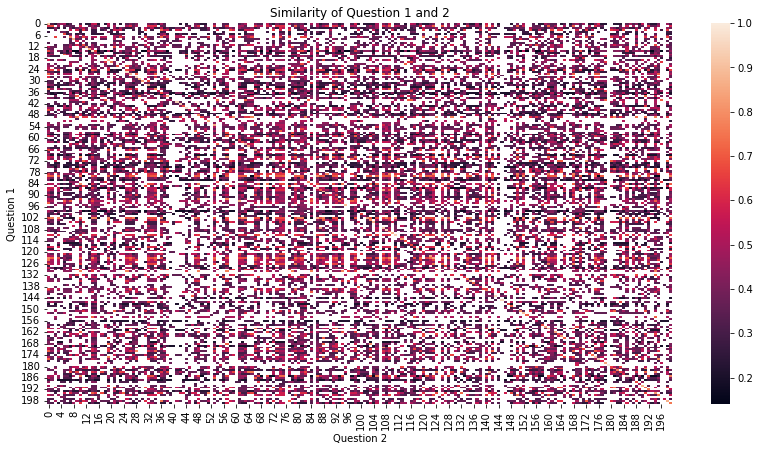

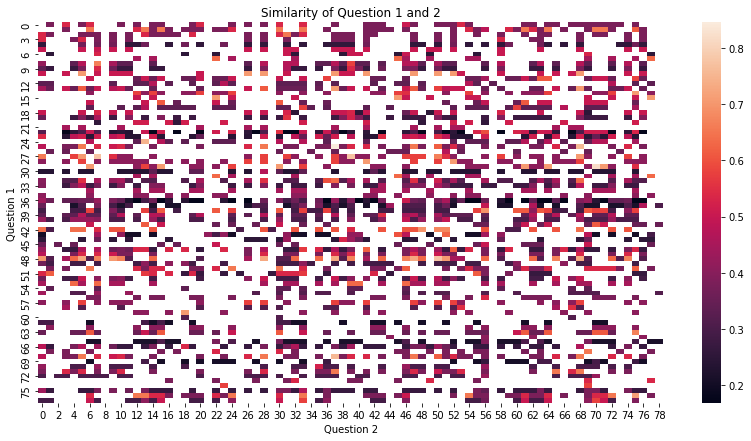

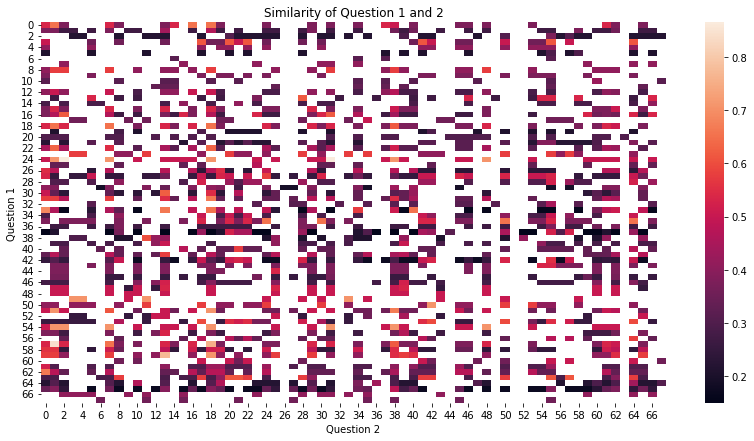

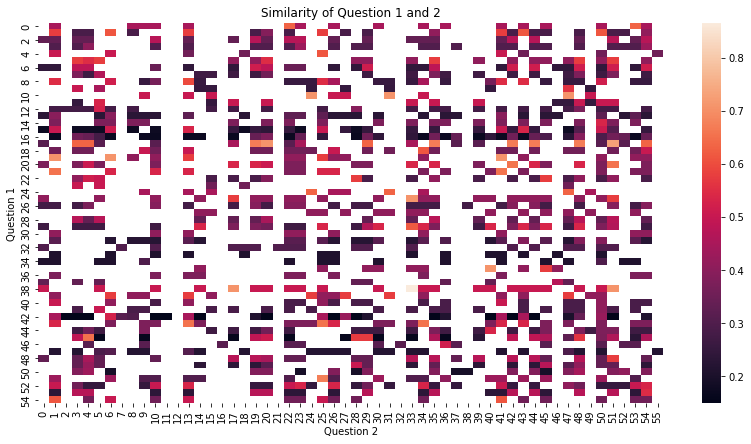

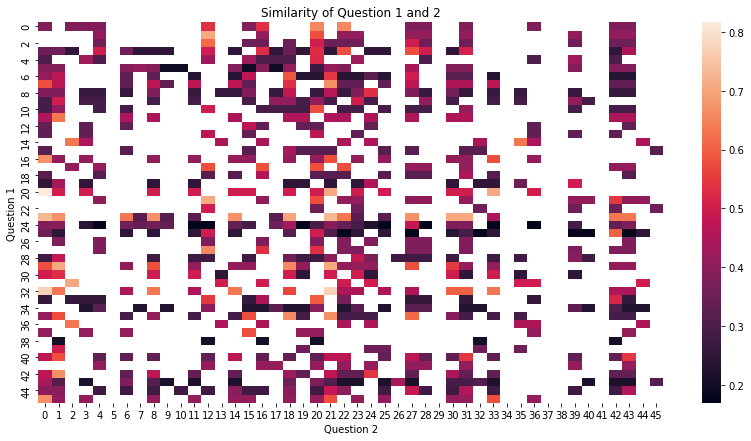

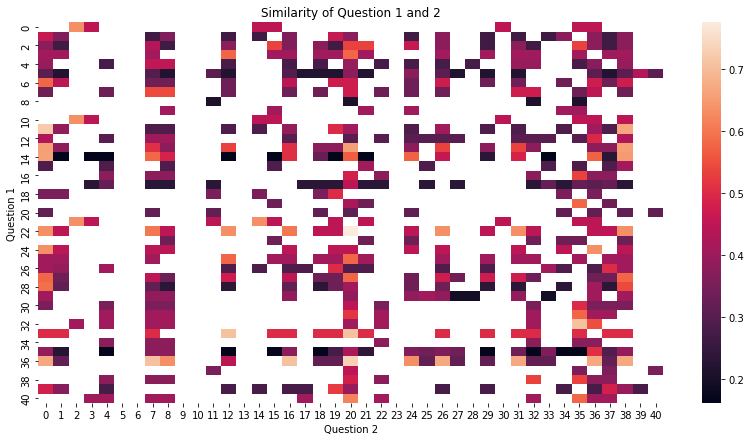

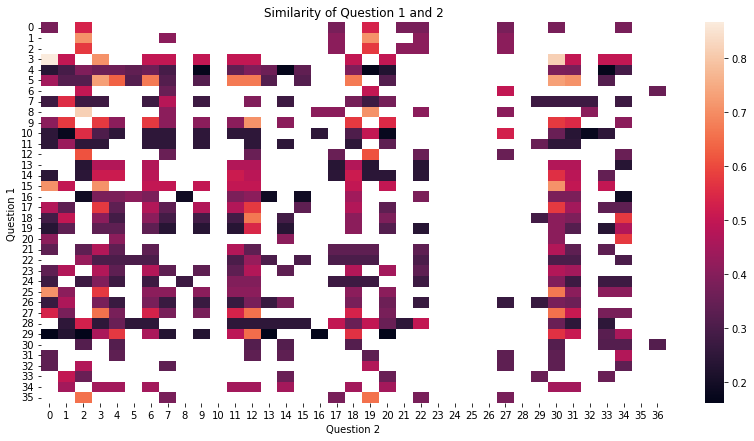

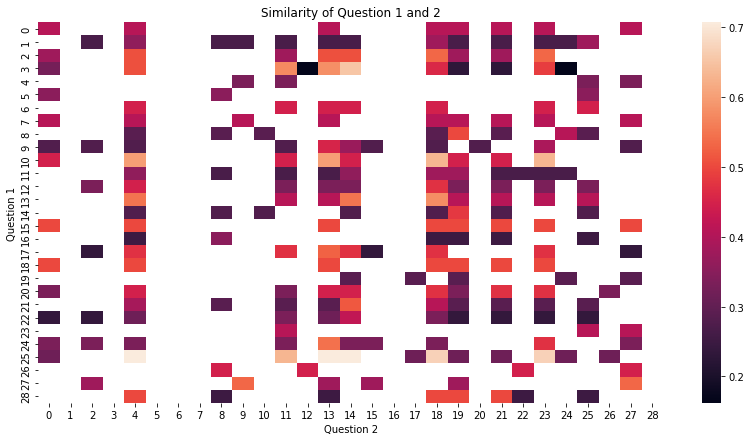

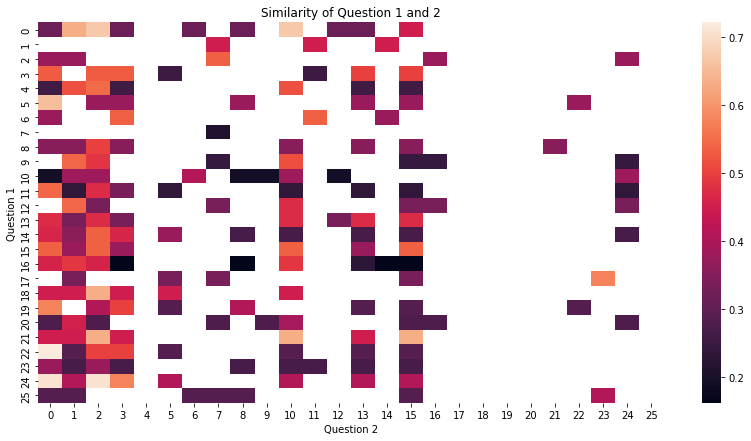

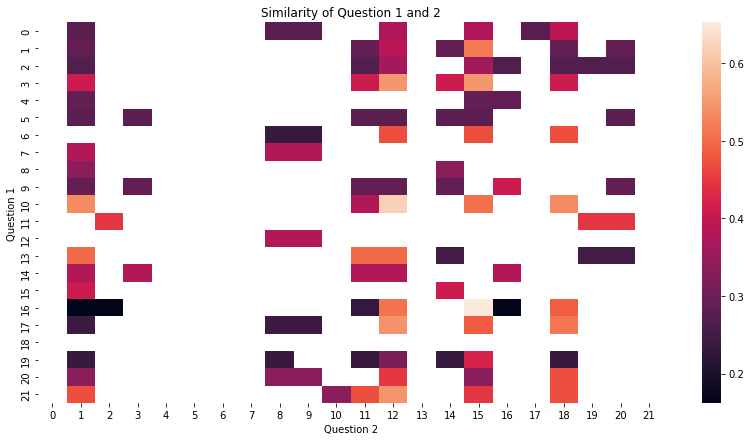

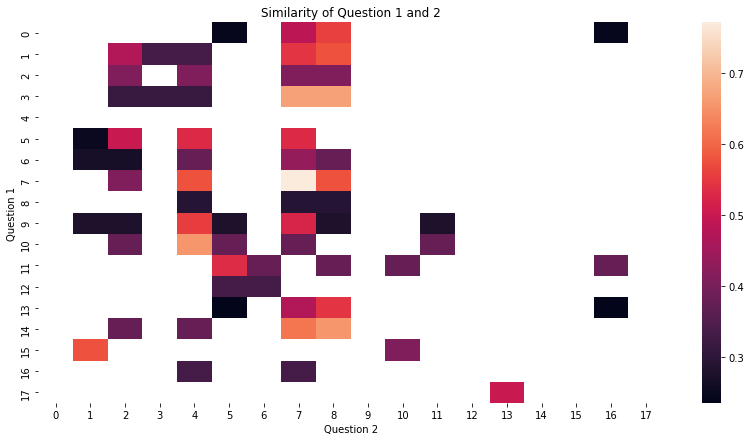

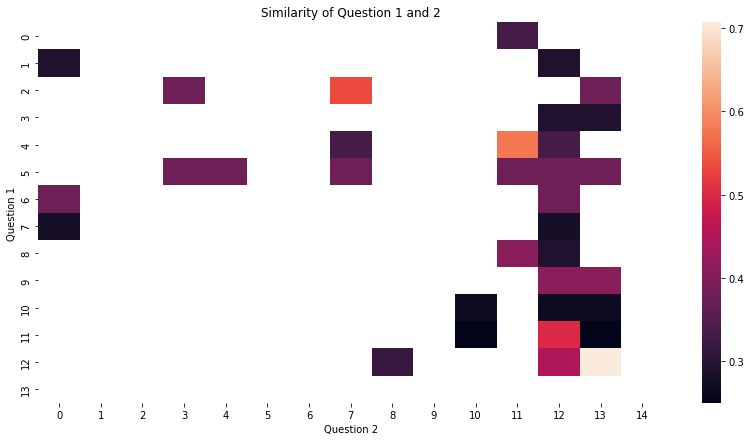

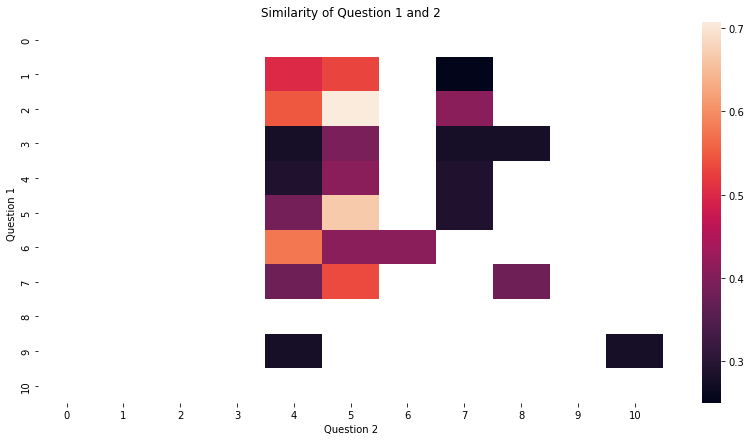

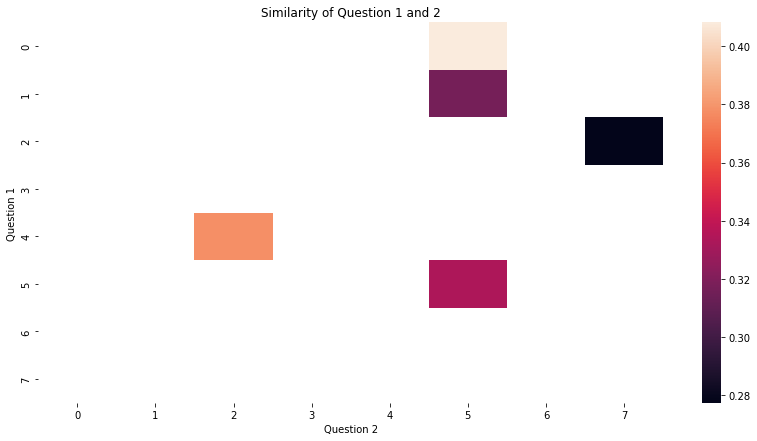

In [116]:
sim_thresh = 0.2
plotORnot = 1
grp_new, df_grp1 = get_unique_sen_grpsWITHmax_MAIN(sen1_ar, sen2_ar, sim_thresh, plotORnot)

ind :  [5, 6, 9]


,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,"[[How, can, I, use, Twitter, for, business?]]","[[How, is, career, launcher, online, program, for, RBI, Grade, B?]]","[[How, do, we, prepare, for, UPSC?]]","[[How, do, I, prepare, for, civil, service?]]","[[How, should, I, prepare, for, CA, final, law?]]","[[How, one, should, know, that, he/she, completely, prepare, for, CA, final, exam?]]","[[What, tripod, should, I, get, for, my, Canon, 6D?]]","[[How, i, get, hair, on, bald, head?]]","[[How, could, I, get, Skype, to, work, on, an, android, 4.1.1, phone?]]","[[How, to, make, friends, ?]]",...,None,None,None,None,None,None,None,None,None,None
1,"[[How, do, I, find, a, startup, accelerator?]]","[[How, do, I, find, a, good, escort?]]","[[Where, can, I, find, a, conversion, chart, for, CC, to, horsepower?]]","[[How, can, I, check, wifi, history, and, access, it, through, android, phones?]]","[[I, cannot, open, Quora, through, my, WiFi, router., Why, can, I, only, access, it, through, a, mobile, network?]]","[[How, do, I, stop, being, over, possessive, for, a, person, whom, I, love?]]","[[I, want, to, make, a, travel, commercial/clip, video, HD, ,, For, India, and, New, Zealand., How, much, will, it, cost?]]","[[Can, I, make, 50,000, a, month, by, day, trading?]]","[[Can, I, make, 30,000, a, month, by, day, trading?]]","[[Can, I, take, rabies, injection, after, 1, day, of, dog, bite?]]",...,None,None,None,None,None,None,None,None,None,None
2,"[[What, is, a, narcissistic, personality, disorder?]]","[[What, is, narcissistic, personality, disorder?]]","[[Who, are, some, notable, folks, who, attended, Caltech?]]","[[What, is, a, Yantra, &, Mantra?]]","[[What, is, a, Horcrux?]]","[[What, is, performance, testing?]]","[[Between, Robert, De, Niro, and, Al, Pacino,, who, is, more, successful?]]","[[Who, do, you, regard, as, the, best, actor,, Robert, De, Niro, or, Al, Pacino?]]","[[Which, one, is, better, polo, diesel, or, grand, i10, petrol?]]","[[What, is, better, for, a, low, back, pain:, heat, or, ice?]]",...,"[[Why, do, some, people, prefer, to, live, with, small, family?]]","[[Why, India, does, not, apply, the, ""Burma-Rohingya, model"", to, deport, illegal, Bangladeshis?]]","[[What, are, some, mind-blowing, computer, tools, that, exist, that, most, people, don't, know, about?]]","[[What, are, some, mind-blowing, technologies, that, exist, that, most, people, don't, know, about?]]","[[What, causes, nightmares, that, seem, real?]]","[[In, how, many, ways, can, we, distribute, 10, identical, looking, pencils, to, 4, students, so, that, each, student, gets, at, least, one, pencil?]]","[[In, how, many, ways, 12, apples, can, be, distributed, among, 4, children, such, that, every, child, gets, at, least, 2, apples?]]","[[What's, one, thing, you, would, like, to, do, better?]]","[[What's, one, thing, you, do, despite, knowing, better?]]","[[How, do, sports, contribute, to, the, society?]]"


# Part 2 : Classifying sentences

In [62]:
# Create a label for the sentence groups
lengrp_maxlen = [lens_of_grps[i] for i in ind]
print('lengrp_maxlen : ', lengrp_maxlen)

y = []
for i, count in enumerate(lengrp_maxlen):
    vec = np.ones((count))
    x = [int(i*k) for k in vec]
    y.append(x)
y = make_a_properlist(y)
y

# Confirmation of label
plotORnot = 0
if plotORnot == 1:
    import plotly.graph_objects as go
    fig = go.Figure()
    config = dict({'scrollZoom': True, 'displayModeBar': True, 'editable': True})
    xxORG = list(range(len(y)))
    xxORG
    fig.add_trace(go.Scatter(x=xxORG, y=y, name='y', line = dict(color='red', width=2, dash='dash'), showlegend=True))
    fig.update_layout(title='outJOY', xaxis_title='data points', yaxis_title='axis sign')
    fig.show(config=config)

lengrp_maxlen :  [16, 79, 141]


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [64]:
# Find keywords across all sentences
v_out = make_a_properlist_str(grp_maxlen)
v_out = make_a_properlist_str(v_out)
tot_sens = len(v_out)

word_tokens = make_a_properlist(v_out)

# Get the theme of the knowledge base
word_tokens2 = preprocessing(word_tokens)

list_to_remove = ['https']
wc, keywords, mat_sort = get_word_count_uniquewords(word_tokens2, list_to_remove)

# Remove all numbers from the keyword list
wt_nums, wt_nums_str, keywords2 = detect_numbers_from_wordtokens(keywords)

keywords2

There are 981 word tokens, but 505 words are unique.
[['11' 'quora']
 ['10' 'peopl']
 ['9' 'india']
 ...
 ['1' 'nation']
 ['1' 'network']
 ['1' 'kerala']]
The following words were present:  ['quora', 'peopl', 'india', 'which', 'differ', 'question', 'learn', 'product', 'battl', 'better', 'speak', 'would', 'where', 'employe', 'thing', 'support', 'attract', 'student', 'manag', 'increas', 'answer', 'becom', 'email', 'prepar', 'process', 'pakistan', 'password', 'could', 'phone', 'physic', 'gmail', 'access', 'program', 'other', 'recov', 'major', 'class', 'market', 'strongest', 'state', 'rohingya', 'recruit', 'offer', 'distribut', 'possibl', 'person', 'mythology', 'number', 'current', 'recoveri', 'video', 'google', 'harri', 'greatest', 'travel', 'govern', 'instagram', 'exampl', 'account', 'first', 'english', 'googl', 'confirm', 'possess', 'cours', 'passiv', 'fluent', 'pencil', 'geologist', 'countri', 'fluently', 'happen', 'follow', 'greek', 'copyright', 'player', 'friend', 'potter', 'follower

['quora',
 'peopl',
 'india',
 'which',
 'differ',
 'question',
 'learn',
 'product',
 'battl',
 'better',
 'speak',
 'would',
 'where',
 'employe',
 'thing',
 'support',
 'attract',
 'student',
 'manag',
 'increas',
 'answer',
 'becom',
 'email',
 'prepar',
 'process',
 'pakistan',
 'password',
 'could',
 'phone',
 'physic',
 'gmail',
 'access',
 'program',
 'other',
 'recov',
 'major',
 'class',
 'market',
 'strongest',
 'state',
 'rohingya',
 'recruit',
 'offer',
 'distribut',
 'possibl',
 'person',
 'mythology',
 'number',
 'current',
 'recoveri',
 'video',
 'google',
 'harri',
 'greatest',
 'travel',
 'govern',
 'instagram',
 'exampl',
 'account',
 'first',
 'english',
 'googl',
 'confirm',
 'possess',
 'cours',
 'passiv',
 'fluent',
 'pencil',
 'geologist',
 'countri',
 'fluently',
 'happen',
 'follow',
 'greek',
 'copyright',
 'player',
 'friend',
 'potter',
 'followers',
 'power',
 'pacino',
 'presid',
 'print',
 'privat',
 'forgot',
 'company',
 'compar',
 'contrast',
 'compet

In [82]:
# Construct a one-hot word matrix
X = np.zeros((len(keywords2), tot_sens))
c = 0
for senarr in grp_maxlen:
    for sen in senarr:
        for word in sen:
            newvec, ind_newvec = findall(keywords2, '==', word)
            
            if is_empty(ind_newvec) == False:
                for i in ind_newvec:
                    # print('i : ', i)
                    # print('c : ', c)
                    X[i,c] = 1
        c = c + 1

# Size confirmation
# y = np.reshape(y, (len(y), 1))
y = np.array(y)
print('size of y (sentences): ', y.shape)
X = X.T
print('size of X (sentences, keywords): ', X.shape)





size of y (sentences):  (236,)
size of X (sentences, keywords):  (236, 505)


In [ ]:

# Verify that the sentences were encoded properly

## sklearn : bag-of-words classification

In [69]:
X_train, X_test, Y_train_1D, Y_test_1D = do_train_test_split(X, y)


# Multilayer perceptron (MLP)/neural network (Deep Learning) : logistic regression NN
model, Y_train_bin, Y_test_bin, Y_train_bin_predict, Y_test_bin_predict, Y_train_bin_pp, Y_test_bin_pp, Y_train_bin_score, Y_test_bin_score = multiclass_multilayer_perceptron_bininput(X_train, X_test, Y_train_1D, Y_test_1D)

value_pack_train = evaluation_methods_multi_class_bin(model, X_train, Y_train_bin, Y_train_bin_predict, Y_train_bin_pp, Y_train_bin_score)
print('value_pack_train : ', value_pack_train)

value_pack_test = evaluation_methods_multi_class_bin(model, X_test, Y_test_bin, Y_test_bin_predict, Y_test_bin_pp, Y_test_bin_score)
print('value_pack_test : ', value_pack_test)

shape of X_train :  (177, 505)
shape of Y_train_1D :  (177,)
shape of X_test :  (59, 505)
shape of Y_test_1D :  (59,)
shape of Y_bin :  (177, 3)
shape of Y_bin :  (59, 3)
shape of Y_train_bin :  (177, 3)
shape of Y_test_bin :  (59, 3)
shape of Y_train_bin_pp :  (177, 3)
shape of Y_test_bin_pp :  (59, 3)
shape of Y_train_bin_score :  (177, 3)
shape of Y_test_bin_score :  (59, 3)
value_pack_train :  {'acc_crossval': array([0.47222222, 0.63888889, 0.6       , 0.74285714, 0.65714286]), 'prec_crossval': array([nan, nan, nan, nan, nan]), 'recall_crossval': array([nan, nan, nan, nan, nan]), 'roc_auc_ovo_weighted_crossval': array([0.60244308, 0.6756993 , 0.66932065, 0.83434874, 0.7787395 ]), 'acc_dircalc': 0.8305084745762712, 'prec_dircalc': 0.8305084745762712, 'recall_dircalc': 0.8305084745762712, 'f1_dircalc': 0.8305084745762712, 'fbeta_dircalc': 0.8305084745762712, 'rocauc_pp_dircalc': 0.9542915509591753, 'rocauc_df_dircalc': 0.9542915509591753}
value_pack_test :  {'acc_crossval': array([0.

In [70]:
def onehot_2_text(oh_vec, keywords):
    
    newvec, ind_newvec = findall(oh_vec, '==', 1)
    sen = [keywords[i] for i in ind_newvec]
    
    return sen

In [74]:
X_train.shape

(177, 505)

In [81]:
for i in range(X_train.shape[0]):
    oh_vec = X_train[i,:]
    sen = onehot_2_text(oh_vec, keywords2)
    print(sen)

['deport']
['number']
['state', 'between', 'buffer', 'neutral']
[]
['first', 'sexual']
['startup']
['greatest']
[]
['final', 'should']
['better']
['better', 'start', 'business']
['class']
['quickest']
['transport']
['speak']
['fluent']
['follow']
['store']
['shave']
['offer']
['civil']
['field']
['month']
['learn', 'product', 'career']
['store', 'possible']
['start', 'business']
[]
['aircraft']
['greatest']
['access', 'android', 'check']
['there', 'control', 'people']
[]
['abstract', 'expressionism']
['things', 'possible']
[]
['invest', 'share']
[]
['speed']
['travel']
[]
[]
['which', 'would', 'state']
['major', 'abstract']
['offer', 'stock']
['copyright', 'upload', 'there', 'block']
['without', 'deduction']
['learn', 'speak']
[]
[]
['access', 'cannot']
[]
['afraid']
['social']
['student', 'least']
['could', 'darth', 'snoke']
[]
['differ', 'novel']
['regular']
[]
['about', 'should', 'girlfriend']
['highest']
[]
['expect']
['older', 'young', 'normal']
['support', 'phone', 'number']
['co

## keras

In [ ]:
# Extra: get keywords per row to understand the context of the similar groups

# Motivation for word embeddings (give CONTEXT word --> predicts TARGET word)


# Way 2 : do t-SNE  (word embeddings) - best way
# but how do you get context words?

Build a database/list of similar words for each of the unique words



use fuzzywuzzywords to search for similar words 

Simple : ensemble model : make a single binary model per unique/key word : Make a X_train 
, y matrix using maybe 75%? of group1 unique words and add on 25%? non-similar words. 

Multi-category : put all data together and make a n-class predictable model for each unique/key word group  - can do deep learning (like the cats/hands) or ML (decision tree SVM, LDA) 

# EXTRA getting get_unique_sen_grpsWITHmax_MAIN to work

In [160]:
def get_sentences_from_grp(df_grp1):

    senarr = df_grp1.iloc[:,0].to_numpy()
    senarr = make_a_properlist_str(senarr)

    # -------------------------

    # Make two sentence lists
    r = int(np.floor(len(senarr)/2))  # half of all sentences
    print('r: ', r)

    sen1_ar_temp = senarr[0:r]
    sen2_ar_temp = senarr[r::]

    return sen1_ar_temp, sen2_ar_temp

C:\Users\jamilah\AppData\Roaming\Python\Python39\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\jamilah\Documents\Subfunctions_python\string_text_processing\get_cossine_similarity.py:51: RuntimeWarning: invalid value encountered in true_divide
  cos_sim = np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))


Total sentences:  122
Total sentences grouped :  77
r:  38
Total sentences:  122
Total sentences grouped :  56
r:  28
Total sentences:  122
Total sentences grouped :  49
r:  24
Total sentences:  122
Total sentences grouped :  38
r:  19
Total sentences:  122
Total sentences grouped :  32
r:  16
Total sentences:  122
Total sentences grouped :  27
r:  13
Total sentences:  122
Total sentences grouped :  20
r:  10
Total sentences:  122
Total sentences grouped :  16
r:  8
Total sentences:  124
Total sentences grouped :  11


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,"[[Why, India, does, not, apply, the, ""Burma-Ro...",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,"[[Which, is, the, best, gaming, laptop, under,...","[[Which, is, the, best, gaming, laptop, under,...","[[Find, the, remainder, when, [math]23^{24}[/m...","[[Who, is, israil, friend?]]","[[Who, is, affected, more, by, a, breakup,, th...","[[Who, are, some, notable, folks, who, attende...",None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,"[[Which, is, the, best, digital, marketing, in...","[[Which, is, the, best, digital, marketing, in...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,"[[Which, one, dissolve, in, water, quikly, sug...","[[Which, fish, would, survive, in, salt, water?]]","[[How, should, I, prepare, for, CA, final, law?]]","[[How, one, should, know, that, he/she, comple...","[[Which, book, should, I, choose, for, referen...","[[Astrology:, I, am, a, Capricorn, Sun, Cap, m...","[[I'm, a, triple, Capricorn, (Sun,, Moon, and,...","[[What, can, make, Physics, easy, to, learn?]]","[[How, can, you, make, physics, easy, to, lear...","[[What, was, your, first, sexual, experience, ...",...,"[[Will, squats, make, my, legs, thicker?]]","[[How, can, I, know, who, logged, in, to, my, ...","[[When, can, I, expect, my, Cognizant, confirm...","[[When, can, I, expect, Cognizant, confirmatio...","[[Why, can't, I, do, my, homework?]]","[[National, Institute, of, Technology,, Kuruks...","[[How, is, the, average, speed, of, gas, molec...","[[How, can, I, keep, my, nose, from, getting, ...","[[How, I, can, speak, English, fluently?]]","[[How, can, I, learn, to, speak, English, flue..."
4,"[[Can, height, increase, after, 25?]]",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,"[[Are, there, any, people, who, genuinely, enj...",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,"[[Is, Kickass, Torrents, trustworthy?]]","[[Is, breast, cancer, preventable?]]",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,"[[How, to, make, friends, ?]]","[[How, helpful, is, QuickBooks', auto, data, r...","[[What, is, the, quickbooks, customer, support...","[[Is, my, boyfriend, lying, about, his, true, ...","[[How, could, I, get, Skype, to, work, on, an,...",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,"[[What, is, the, best, book, ever, made?]]","[[What, is, the, most, important, book, you, h...","[[What, does, manipulation, mean?]]","[[What, does, manipulation, means?]]","[[How, does, 3D, printing, work?]]","[[How, do, 3D, printing, work?]]","[[What's, the, difference, between, honest, an...","[[What, is, web, application?]]","[[What, is, the, web, application, framework?]]","[[What, is, performance, testing?]]",...,None,None,None,None,None,None,None,None,None,None
9,"[[Aerodynamically, what, happens, when, propel...",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


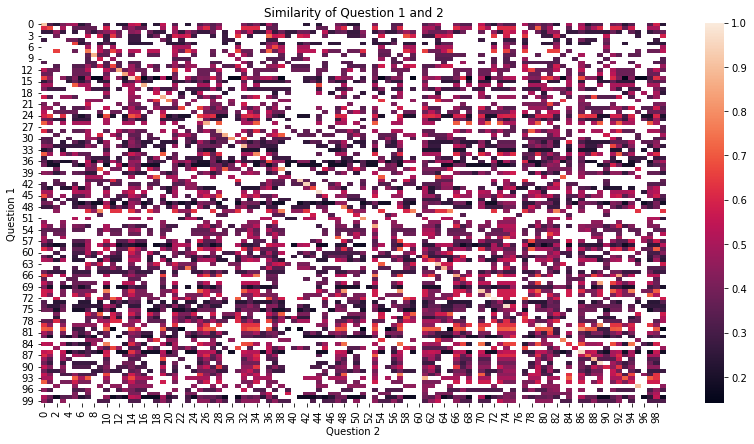

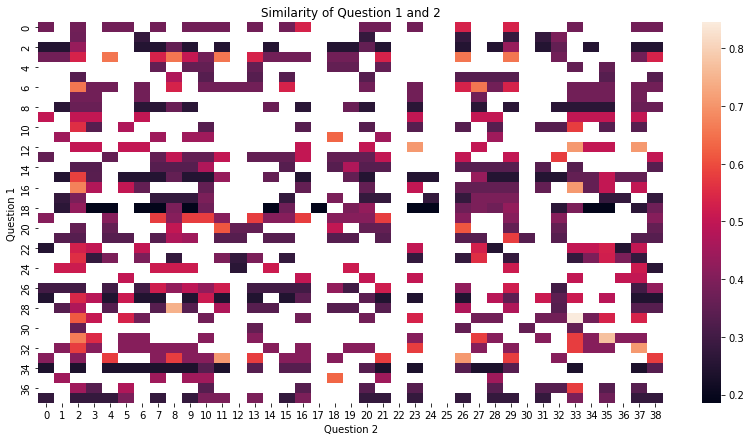

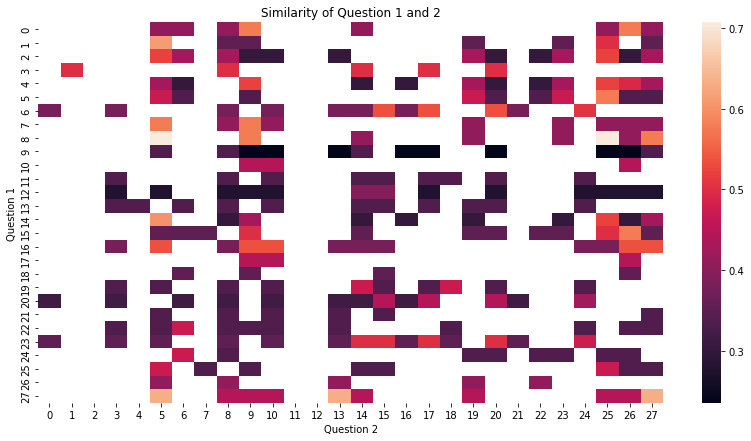

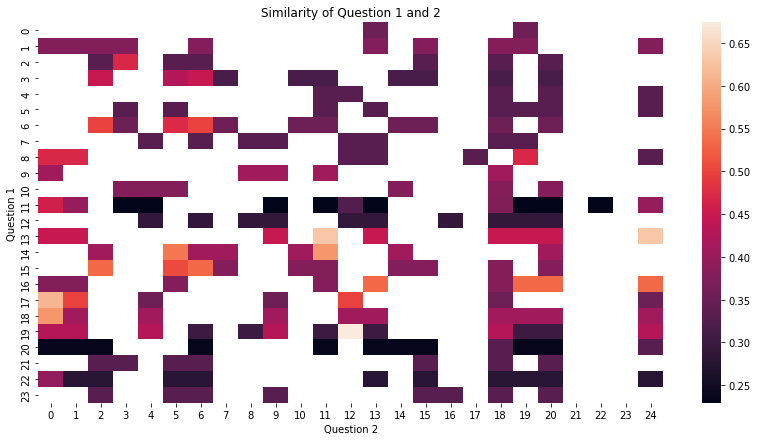

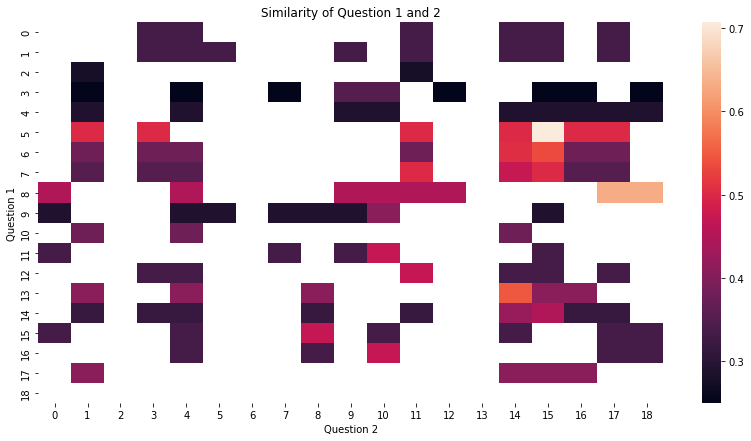

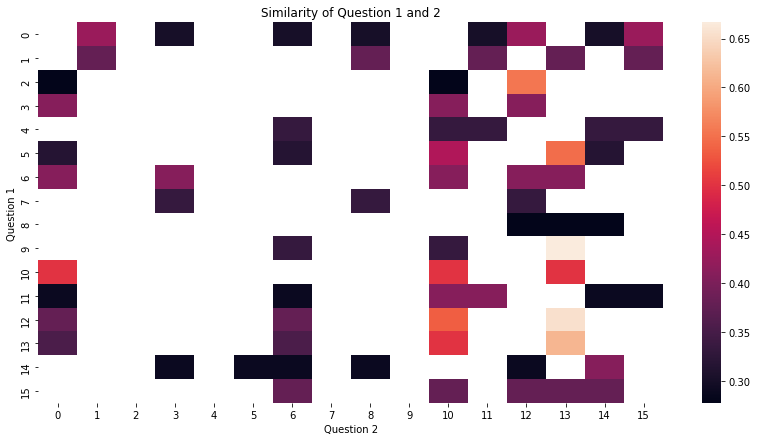

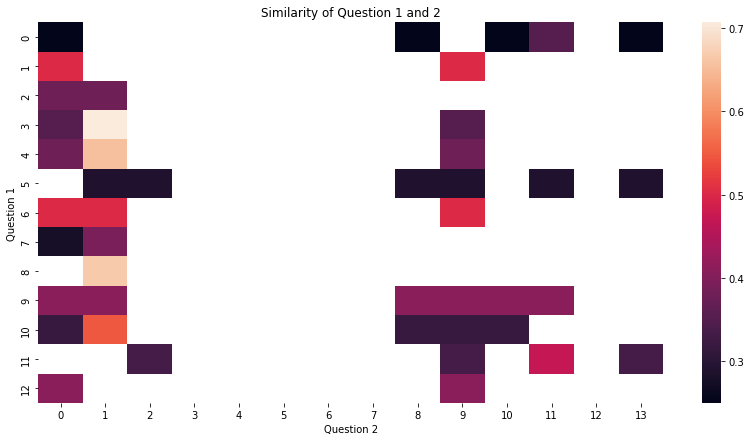

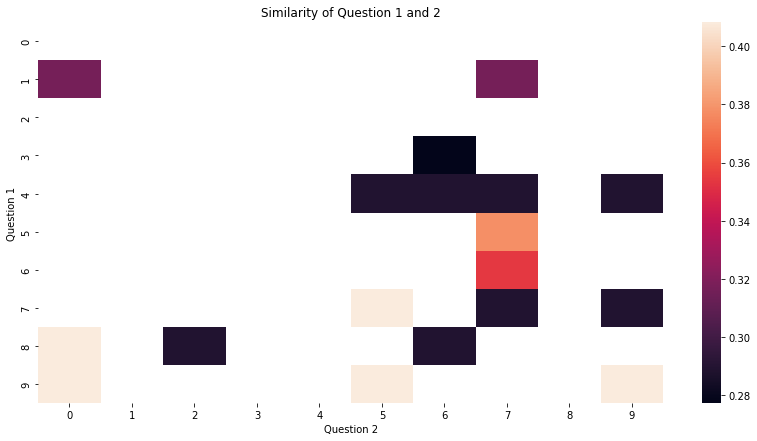

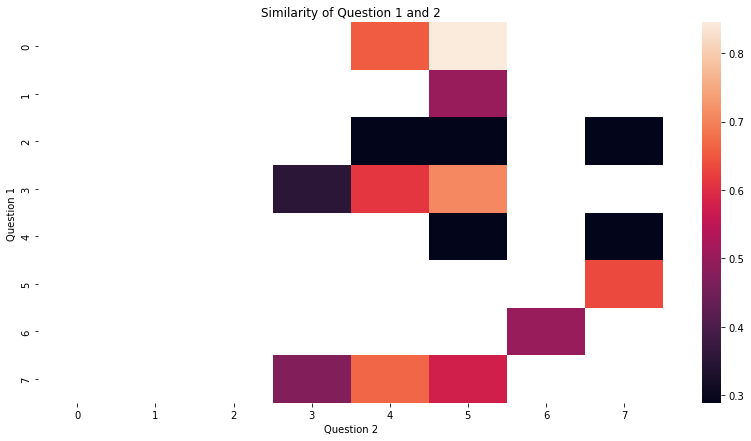

In [176]:
# Second try
sim_thresh = 0.01
plotORnot = 1
k = 30


# sen1_ar_temp = sen1_ar[0:k]
# sen2_ar_temp = sen2_ar[0:k]

# ----------REPEATS---------------

# step 0
# sen1_ar_temp = sen1_ar[0:k]
# sen2_ar_temp = sen2_ar[0:k]
sen1_ar_temp = sen1_ar
sen2_ar_temp = sen2_ar

# step 1
grp_new = get_unique_sen_grpsWITHmax(sen1_ar_temp, sen2_ar_temp, sim_thresh, plotORnot)

# step 5
# combine grp_new1 and grp_new2
# grp_new = grp_new, grp_new2
# grp_new = make_a_properlist_str(grp_new)

# step 6
# Condense sentence groups
# grp_new = minimally_regroup_senarr2(grp_new)

# Check
v_out = make_a_properlist_str(grp_new)
v_out = make_a_properlist_str(v_out)
orglen = len(v_out)
print('Total sentences: ', orglen)
print('Total sentences grouped : ', len(grp_new))

# step 2
df_grp1 = pandas_visualize_senarr(grp_new)
# df_grp1

# ----------REPEATS---------------
while len(v_out) == orglen:
    # step 3
    sen1_ar_temp, sen2_ar_temp = get_sentences_from_grp(df_grp1)

    # step 4
    grp_new2 = get_unique_sen_grpsWITHmax(sen1_ar_temp, sen2_ar_temp, sim_thresh, plotORnot)

    # step 5
    # combine grp_new1 and grp_new2
    grp_new = grp_new, grp_new2
    grp_new = make_a_properlist_str(grp_new)

    # step 6
    # Condense sentence groups
    grp_new = minimally_regroup_senarr2(grp_new)
    
    # Check
    v_out = make_a_properlist_str(grp_new)
    v_out = make_a_properlist_str(v_out)
    print('Total sentences: ', len(v_out))
    print('Total sentences grouped : ', len(grp_new))

    # step 7
    df_grp1 = pandas_visualize_senarr(grp_new)
    # df_grp1
df_grp1

r:  5


C:\Users\jamilah\AppData\Roaming\Python\Python39\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\jamilah\Documents\Subfunctions_python\string_text_processing\get_cossine_similarity.py:51: RuntimeWarning: invalid value encountered in true_divide
  cos_sim = np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))


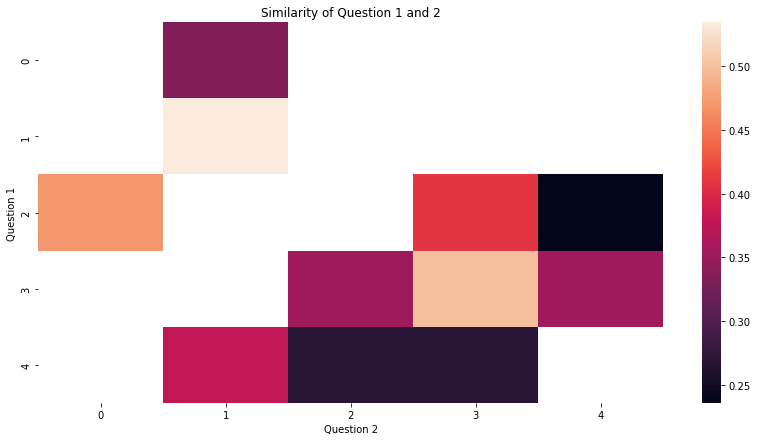

In [151]:
# Re run to condense sentences
senarr = df_grp1.iloc[:,0].to_numpy()
senarr = make_a_properlist_str(senarr)

# -------------------------

# Make two sentence lists
r = int(np.floor(len(senarr)/2))  # half of all sentences
print('r: ', r)

sen1_ar_temp = senarr[0:r]
sen2_ar_temp = senarr[r::]

# -------------------------

grp_new2 = get_unique_sen_grpsWITHmax(sen1_ar_temp, sen2_ar_temp, sim_thresh, plotORnot)

In [152]:
df_grp2 = pandas_visualize_senarr(grp_new2)
df_grp2

,0,1,2,3
0,"[[How, can, I, be, a, good, geologist?]]","[[Astrology:, I, am, a, Capricorn, Sun, Cap, m...","[[How, can, I, increase, the, speed, of, my, i...","[[Motorola, (company):, Can, I, hack, my, Char..."
1,"[[What, is, the, step, by, step, guide, to, in...","[[Which, one, dissolve, in, water, quikly, sug...",None,None
2,"[[What, is, the, story, of, Kohinoor, (Koh-i-N...","[[Find, the, remainder, when, [math]23^{24}[/m...",None,None
3,"[[When, do, you, use, シ, instead, of, し?]]",None,None,None
4,"[[What, keeps, childern, active, and, far, fro...",None,None,None


In [153]:
# Condense grp_new1 and grp_new2

# Make one sentence array
grp_new = grp_new1, grp_new2
grp_new = make_a_properlist_str(grp_new)

df_grp2 = pandas_visualize_senarr(grp_new)
df_grp2

,0,1,2,3
0,"[[Motorola, (company):, Can, I, hack, my, Char...","[[How, do, I, hack, Motorola, DCX3400, for, fr...","[[Why, am, I, mentally, very, lonely?, How, ca...",None
1,"[[How, can, I, be, a, good, geologist?]]","[[What, should, I, do, to, be, a, great, geolo...","[[Should, I, buy, tiago?]]",None
2,"[[What, is, the, step, by, step, guide, to, in...","[[What, is, the, step, by, step, guide, to, in...",None,None
3,"[[What, is, the, story, of, Kohinoor, (Koh-i-N...","[[What, would, happen, if, the, Indian, govern...",None,None
4,"[[How, can, I, increase, the, speed, of, my, i...","[[How, can, Internet, speed, be, increased, by...",None,None
5,"[[Which, one, dissolve, in, water, quikly, sug...","[[Which, fish, would, survive, in, salt, water?]]",None,None
6,"[[Astrology:, I, am, a, Capricorn, Sun, Cap, m...","[[I'm, a, triple, Capricorn, (Sun,, Moon, and,...",None,None
7,"[[When, do, you, use, シ, instead, of, し?]]","[[When, do, you, use, ""&"", instead, of, ""and""?]]",None,None
8,"[[Find, the, remainder, when, [math]23^{24}[/m...",None,None,None
9,"[[What, keeps, childern, active, and, far, fro...",None,None,None


## Condense sentence array groups

In [155]:
uq_sen_grp = minimally_regroup_senarr2(grp_new)

df_grp2 = pandas_visualize_senarr(uq_sen_grp)
df_grp2

Total sentences:  20


,0,1,2,3,4,5,6,7,8,9
0,"[[When, do, you, use, シ, instead, of, し?]]","[[When, do, you, use, ""&"", instead, of, ""and""?]]",None,None,None,None,None,None,None,None
1,"[[What, is, the, story, of, Kohinoor, (Koh-i-N...","[[What, would, happen, if, the, Indian, govern...","[[Find, the, remainder, when, [math]23^{24}[/m...",None,None,None,None,None,None,None
2,"[[Motorola, (company):, Can, I, hack, my, Char...","[[How, do, I, hack, Motorola, DCX3400, for, fr...","[[Why, am, I, mentally, very, lonely?, How, ca...","[[How, can, I, be, a, good, geologist?]]","[[What, should, I, do, to, be, a, great, geolo...","[[Should, I, buy, tiago?]]","[[How, can, I, increase, the, speed, of, my, i...","[[How, can, Internet, speed, be, increased, by...","[[Astrology:, I, am, a, Capricorn, Sun, Cap, m...","[[I'm, a, triple, Capricorn, (Sun,, Moon, and,..."
3,"[[What, is, the, step, by, step, guide, to, in...","[[What, is, the, step, by, step, guide, to, in...","[[Which, one, dissolve, in, water, quikly, sug...","[[Which, fish, would, survive, in, salt, water?]]",None,None,None,None,None,None
4,"[[What, keeps, childern, active, and, far, fro...",None,None,None,None,None,None,None,None,None


In [18]:
# dummy prob
grp_bad = [[['a'], ['b']], [['a'], ['c'], ['d']], [['a'], ['b'], ['e']], [['f'], ['g']]]
#b = [['the house'], ['the car']]

uq_sen_grp = minimally_regroup_senarr2(grp_bad)

df_grp2 = pandas_visualize_senarr(uq_sen_grp)
df_grp2

[[['a'], ['b']], [['a'], ['c'], ['d']], [['a'], ['b'], ['e']], [['f'], ['g']]]

# EXTRA sentence condense workout

In [35]:
grp_red = grp_new
grp_red

[[['Why',
   'am',
   'I',
   'mentally',
   'very',
   'lonely?',
   'How',
   'can',
   'I',
   'solve',
   'it?'],
  ['How',
   'can',
   'Internet',
   'speed',
   'be',
   'increased',
   'by',
   'hacking',
   'through',
   'DNS?'],
  ['How',
   'can',
   'I',
   'increase',
   'the',
   'speed',
   'of',
   'my',
   'internet',
   'connection',
   'while',
   'using',
   'a',
   'VPN?']],
 [['What',
   'is',
   'the',
   'step',
   'by',
   'step',
   'guide',
   'to',
   'invest',
   'in',
   'share',
   'market',
   'in',
   'india?'],
  ['What',
   'is',
   'the',
   'step',
   'by',
   'step',
   'guide',
   'to',
   'invest',
   'in',
   'share',
   'market?']],
 [['What', 'is', 'the', 'story', 'of', 'Kohinoor', '(Koh-i-Noor)', 'Diamond?'],
  ['What',
   'would',
   'happen',
   'if',
   'the',
   'Indian',
   'government',
   'stole',
   'the',
   'Kohinoor',
   '(Koh-i-Noor)',
   'diamond',
   'back?']],
 [['Which',
   'one',
   'dissolve',
   'in',
   'water',
   'quikly

In [36]:
grp_str = []
grp_ind = []

for i in range(len(grp_red)):
    for j in range(len(grp_red[i])):
        grp_str.append(grp_red[i][j])
        grp_ind.append(i)

# find unique string value
ind_new, uq_senarray = unique_str_arrays(grp_str)
print('uq_senarray: ', uq_senarray)


# get unique strings per grp
grps = []
for i in uq_senarray:
    # print('i: ', i)
    val,indy = findall(grp_str, '==', i)
    # print('indy: ', indy)
    out = [grp_ind[q] for q in indy]
    # print('out: ', out)
    grps.append(out)
print('grps: ', grps)
  

# each number in each set of grps is the sentence group number
# each set is a unique sentence = uq_senarray

uq_senarray:  [['Why', 'am', 'I', 'mentally', 'very', 'lonely?', 'How', 'can', 'I', 'solve', 'it?'], ['How', 'can', 'Internet', 'speed', 'be', 'increased', 'by', 'hacking', 'through', 'DNS?'], ['How', 'can', 'I', 'increase', 'the', 'speed', 'of', 'my', 'internet', 'connection', 'while', 'using', 'a', 'VPN?'], ['What', 'is', 'the', 'step', 'by', 'step', 'guide', 'to', 'invest', 'in', 'share', 'market', 'in', 'india?'], ['What', 'is', 'the', 'step', 'by', 'step', 'guide', 'to', 'invest', 'in', 'share', 'market?'], ['What', 'is', 'the', 'story', 'of', 'Kohinoor', '(Koh-i-Noor)', 'Diamond?'], ['What', 'would', 'happen', 'if', 'the', 'Indian', 'government', 'stole', 'the', 'Kohinoor', '(Koh-i-Noor)', 'diamond', 'back?'], ['Which', 'one', 'dissolve', 'in', 'water', 'quikly', 'sugar,', 'salt,', 'methane', 'and', 'carbon', 'di', 'oxide?'], ['Which', 'fish', 'would', 'survive', 'in', 'salt', 'water?'], ['Find', 'the', 'remainder', 'when', '[math]23^{24}[/math]', 'is', 'divided', 'by', '24,23?']

C:\Users\jamilah\AppData\Roaming\Python\Python39\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [37]:
# could get unique sets first 
ind, uq_grps = unique_str_arrays(grps)
print('uq_grps: ', uq_grps)
print('ind: ', ind)

# then check if smaller sets are in larger sets
len_of_sets = [len(i) for i in uq_grps]
print('len_of_sets: ', len_of_sets)

uq_grps:  [[0], [1, 5], [1], [2, 6], [2], [3, 5], [3], [4, 7]]
ind:  [0, 3, 4, 5, 6, 7, 8, 9]
len_of_sets:  [1, 2, 1, 2, 1, 2, 1, 2]


In [39]:
# sort len_of_sets from small to big
sort_index = np.argsort(len_of_sets)
print('sort_index: ', sort_index)

s_len_of_sets = [uq_grps[i] for i in sort_index]
print('s_len_of_sets: ', s_len_of_sets)
# s_len_of_sets is a list of most reduced cross-referenced groups 

sort_index:  [0 2 4 6 1 3 5 7]
s_len_of_sets:  [[0], [1], [2], [3], [1, 5], [2, 6], [3, 5], [4, 7]]


In [113]:
def is_shorter_in_arr(shorter, arr):
    
    if is_empty(arr) == False:
        # do not consider the last entry of the array because it is shorter 
        arr = arr[0:-1]
        
    # Determine if entries of shorter are in arr
    indy = []
    for q in shorter:
        print('q: ', q)

        for ae_ind, arr_element in enumerate(arr):
            arr_element = make_a_properlist(arr_element)
            # print('arr_element: ', arr_element)
            for arr_entry in arr_element:
                if arr_entry == q:
                    indy.append(ae_ind)
    print('indy: ', indy)
    
    # indy are entries in shorter that are in arr
    
    if is_empty(indy) == True: # is empty
        # Means that there are NO entries in shosrter that are in arr
        # add shorter to arr
        arr.append(shorter)
    else:
        # if past entries of arr contain shorter entries
        # combine those past entries of arr into shorter - update arr
        
        # indy is the index of arr that holds repeating entries that are in shorter
        shorter_new = [arr[i] for i in indy]
        print('shorter_new: ', shorter_new)
        shorter = shorter + shorter_new
        shorter = make_a_properlist(shorter)
        # print('shorter: ', shorter)
        shorter = np.unique(shorter)
        # print('shorter: ', shorter)
        shorter = make_a_properlist(shorter)
        print('shorter: ', shorter)

        # remove the indy entries of arr 
        rr = list(range(len(arr)))
        print('rr: ', rr)

        not_indy = np.setdiff1d(rr, indy)
        print('not_indy: ', not_indy)

        arr_new = []
        for i in not_indy:
             arr_new.append(arr[i])
        arr = arr_new
        arr.append(shorter)
        
    arr = make_a_properlist_str(arr)
    
    return shorter, arr

In [115]:
arr = []
for i in range(len(s_len_of_sets)-1):
    
    print('i: ', i)
    longer = s_len_of_sets[i+1]
    shorter = s_len_of_sets[i]
    print('longer: ', longer)
    print('shorter: ', shorter)
    out = np.setdiff1d(longer, shorter) 
    print('out: ', out)
    
    # A) Search if shorter is in past entries of arr AND add shorter to arr
    shorter, arr = is_shorter_in_arr(shorter, arr)
    print('arr after A : ', arr)
    print('shorter after A : ', shorter)
    
    # B) Search for similar entries in shorter and longer - 
    # if entries of longer are different from shorter, append longer 
        
    # case 0: No entries of shorter are in longer
    if len(out) == len(longer):
        print('B: case 0: No entries of shorter are in longer')
        # add longer to arr
        arr.append(longer)
    
    # case 1: Some entries in shorter are in longer
    elif len(out) < len(longer):
        print('B: case 1: Some entries in shorter are in longer')
        # merge longer with shorter
        keep_val = [shorter, longer]
        keep_val = make_a_properlist(keep_val)
        keep_val = np.unique(keep_val)
        keep_val = make_a_properlist(keep_val)
                
        print('keep_val: ', keep_val)
        arr.append(keep_val)
        
    # case 2: ALL the entries of shorter are in longer
    #elif is_empty(out) == True:
        # DO NOTHING: shorter and longer are already in the array
    print('arr after B : ', arr)
    
# gives uniquely clustered groups, based on unique sentences
arr

i:  0
longer:  [1]
shorter:  [0]
out:  [1]
q:  0
indy:  []
arr after A :  [[0]]
shorter after A :  [0]
B: case 0: No entries of shorter are in longer
arr after B :  [[0], [1]]
i:  1
longer:  [2]
shorter:  [1]
out:  [2]
q:  1
indy:  []
arr after A :  [[0], [1]]
shorter after A :  [1]
B: case 0: No entries of shorter are in longer
arr after B :  [[0], [1], [2]]
i:  2
longer:  [3]
shorter:  [2]
out:  [3]
q:  2
indy:  []
arr after A :  [[0], [1], [2]]
shorter after A :  [2]
B: case 0: No entries of shorter are in longer
arr after B :  [[0], [1], [2], [3]]
i:  3
longer:  [1, 5]
shorter:  [3]
out:  [1 5]
q:  3
indy:  []
arr after A :  [[0], [1], [2], [3]]
shorter after A :  [3]
B: case 0: No entries of shorter are in longer
arr after B :  [[0], [1], [2], [3], [1, 5]]
i:  4
longer:  [2, 6]
shorter:  [1, 5]
out:  [2 6]
q:  1
q:  5
indy:  [1]
shorter_new:  [[1]]
shorter:  [1, 5]
rr:  [0, 1, 2, 3]
not_indy:  [0 2 3]
arr after A :  [[0], [2], [3], [1, 5]]
shorter after A :  [1, 5]
B: case 0: No e

[[0], [2, 6], [1, 3, 5], [4, 7]]

In [137]:
grp_new = []
# so now plug in by group
for i in range(len(arr)):
    arg = []
    for j in range(len(arr[i])):
        arg.append(grp_red[arr[i][j]])
    grp_new.append(arg)
grp_new

[[[['Why',
    'am',
    'I',
    'mentally',
    'very',
    'lonely?',
    'How',
    'can',
    'I',
    'solve',
    'it?'],
   ['How',
    'can',
    'Internet',
    'speed',
    'be',
    'increased',
    'by',
    'hacking',
    'through',
    'DNS?'],
   ['How',
    'can',
    'I',
    'increase',
    'the',
    'speed',
    'of',
    'my',
    'internet',
    'connection',
    'while',
    'using',
    'a',
    'VPN?']]],
 [[['What',
    'is',
    'the',
    'story',
    'of',
    'Kohinoor',
    '(Koh-i-Noor)',
    'Diamond?'],
   ['What',
    'would',
    'happen',
    'if',
    'the',
    'Indian',
    'government',
    'stole',
    'the',
    'Kohinoor',
    '(Koh-i-Noor)',
    'diamond',
    'back?']],
  [['What',
    'is',
    'the',
    'story',
    'of',
    'Kohinoor',
    '(Koh-i-Noor)',
    'Diamond?']]],
 [[['What',
    'is',
    'the',
    'step',
    'by',
    'step',
    'guide',
    'to',
    'invest',
    'in',
    'share',
    'market',
    'in',
    'india?'

In [139]:
uq_sen_grp = []
for i in grp_new:
    # print('i: ', i)
    # make all entries into a proper list
    pl = []
    for num in i:
        v_out = make_a_properlist_str(num)
        pl.append(v_out)
    v_out = make_a_properlist_str(pl)
    indsa, outsa  = unique_str_arrays(v_out)
    uq_sen_grp.append(outsa)
uq_sen_grp

i:  [[['Why', 'am', 'I', 'mentally', 'very', 'lonely?', 'How', 'can', 'I', 'solve', 'it?'], ['How', 'can', 'Internet', 'speed', 'be', 'increased', 'by', 'hacking', 'through', 'DNS?'], ['How', 'can', 'I', 'increase', 'the', 'speed', 'of', 'my', 'internet', 'connection', 'while', 'using', 'a', 'VPN?']]]
i:  [[['What', 'is', 'the', 'story', 'of', 'Kohinoor', '(Koh-i-Noor)', 'Diamond?'], ['What', 'would', 'happen', 'if', 'the', 'Indian', 'government', 'stole', 'the', 'Kohinoor', '(Koh-i-Noor)', 'diamond', 'back?']], [['What', 'is', 'the', 'story', 'of', 'Kohinoor', '(Koh-i-Noor)', 'Diamond?']]]
i:  [[['What', 'is', 'the', 'step', 'by', 'step', 'guide', 'to', 'invest', 'in', 'share', 'market', 'in', 'india?'], ['What', 'is', 'the', 'step', 'by', 'step', 'guide', 'to', 'invest', 'in', 'share', 'market?']], [['Which', 'one', 'dissolve', 'in', 'water', 'quikly', 'sugar,', 'salt,', 'methane', 'and', 'carbon', 'di', 'oxide?'], ['Which', 'fish', 'would', 'survive', 'in', 'salt', 'water?']], [['Wh

[[['Why',
   'am',
   'I',
   'mentally',
   'very',
   'lonely?',
   'How',
   'can',
   'I',
   'solve',
   'it?'],
  ['How',
   'can',
   'Internet',
   'speed',
   'be',
   'increased',
   'by',
   'hacking',
   'through',
   'DNS?'],
  ['How',
   'can',
   'I',
   'increase',
   'the',
   'speed',
   'of',
   'my',
   'internet',
   'connection',
   'while',
   'using',
   'a',
   'VPN?']],
 [['What', 'is', 'the', 'story', 'of', 'Kohinoor', '(Koh-i-Noor)', 'Diamond?'],
  ['What',
   'would',
   'happen',
   'if',
   'the',
   'Indian',
   'government',
   'stole',
   'the',
   'Kohinoor',
   '(Koh-i-Noor)',
   'diamond',
   'back?']],
 [['What',
   'is',
   'the',
   'step',
   'by',
   'step',
   'guide',
   'to',
   'invest',
   'in',
   'share',
   'market',
   'in',
   'india?'],
  ['What',
   'is',
   'the',
   'step',
   'by',
   'step',
   'guide',
   'to',
   'invest',
   'in',
   'share',
   'market?'],
  ['Which',
   'one',
   'dissolve',
   'in',
   'water',
   'quikly'

In [140]:
df_grp2 = pandas_visualize_senarr(uq_sen_grp)
df_grp2

,0,1,2,3
0,"[[Why, am, I, mentally, very, lonely?, How, ca...","[[How, can, Internet, speed, be, increased, by...","[[How, can, I, increase, the, speed, of, my, i...",None
1,"[[What, is, the, story, of, Kohinoor, (Koh-i-N...","[[What, would, happen, if, the, Indian, govern...",None,None
2,"[[What, is, the, step, by, step, guide, to, in...","[[What, is, the, step, by, step, guide, to, in...","[[Which, one, dissolve, in, water, quikly, sug...","[[Which, fish, would, survive, in, salt, water?]]"
3,"[[Find, the, remainder, when, [math]23^{24}[/m...",None,None,None


In [143]:
v_out = make_a_properlist_str(uq_sen_grp)
v_out = make_a_properlist_str(v_out)
print('Total sentences: ', len(v_out))


10

# EXTRA

In [ ]:
# Run initially
sim_thresh = 0.3

sen1_ar_temp = sen1_ar[0:10]
sen2_ar_temp = sen2_ar[0:10]

plotORnot = 1

grp = sen1_ar_temp, sen2_ar_temp
grp = make_a_properlist(grp)
print('Total number of sentence groups: ', len(grp))

# put extra square brackets around each sentence
temp = []
for i in grp:
    temp.append([i])
grp = temp

grp_red = grp # initialization

In [ ]:
# Run in loop
cossim_sen_mat = calc_cossim_mat_of_2sen_arr(sen1_ar_temp, sen2_ar_temp, plotORnot)

row, col = cossim_sen_mat.shape

# Remove all nan
for i in range(row):
    for j in range(col):
        if isnan(cossim_sen_mat[i,j]) == True:
            cossim_sen_mat[i,j] = 0

# -------------------------

# Want the max column numbers per s1 ONLY if it is greater than sim_thresh
a = np.argmax(cossim_sen_mat, axis=1)  # max across columns
a_mod = {}
s1index = []
for s1num, s2num in enumerate(a):
    if cossim_sen_mat[s1num, s2num] > sim_thresh:
        a_mod[s1num] = s2num
        s1index.append(s1num)
print('a_mod: ', a_mod)

# -------------------------
if not any(a_mod) == False:  # is not empty
    
    # Remove repeating s2 values
    s1_loc = list(a_mod.keys())
    s2_loc = list(a_mod.values())
    print('s1_loc : ', s1_loc)
    print('s2_loc : ', s2_loc)
    
    # s1_loc, s2_loc = remove_repeating_s2_matches(s1_loc, s2_loc, cossim_sen_mat)
    
    # print('s1_loc AFTER repeat removal : ', s1_loc)
    # print('s2_loc AFTER repeat removal  : ', s2_loc)
    
    # Count how many s1 matches found
    matches = len(s1_loc)
    print('matches: ', matches)
    
    # -------------------------
    
    # Reorganize grp with newly grouped word sentences
    grp_red = []
    for i in range(matches):
        print('i: ', i)
        
        # these two sentences are similar so, use the index to get the sentences
        ind_s1 = s1_loc[i]
        ind_s2 = s2_loc[i]
        
        # Search through grp and put these entries in the new grp
        ind_newvec1 = []
        for i in range(len(grp)):
            for j in range(len(grp[i])):
                if grp[i][j] == sen1_ar_temp[ind_s1]:
                    ind_newvec1.append(i)
        print('ind_newvec1: ', ind_newvec1)
        
        ind_newvec2 = []
        for i in range(len(grp)):
            for j in range(len(grp[i])):
                if grp[i][j] == list(np.ravel(sen2_ar_temp[ind_s2])):
                    ind_newvec2.append(i)
        print('ind_newvec2: ', ind_newvec2)
        
        ind_tot = ind_newvec1, ind_newvec2
        ind_tot = make_a_properlist(np.unique(ind_tot))
        ind_tot = [int(q) for q in ind_tot]
        print('ind_tot: ', ind_tot)
        
        if not any(ind_tot) == False:  # Means the vector is NOT empty
            arr = []
            for q in ind_tot:
                arr.append(grp[q])
            print('arr: ', arr)

        grp_red.append(arr)

    print('length of grp_red: ', len(grp_red))
    
    # -------------------------
    
    # Tally up the remaining questions that did not have a match
    # sentence 1
    remaining_row = np.setdiff1d(range(row), s1_loc)
    print('remaining_row: ', remaining_row)
    
    # sentence 2
    remaining_col = np.setdiff1d(range(col), s2_loc)
    print('remaining_col: ', remaining_col)
    
    if not any(remaining_row) == False:  # is not empty
        # get remaining sentences
        for i in remaining_row:
            print('sen1_ar_temp[i]: ', sen1_ar_temp[i])
            grp_red.append([sen1_ar_temp[i]])
    
    if not any(remaining_col) == False:  # is not empty
        # get remaining sentences
        for i in remaining_col:
            print('sen2_ar_temp[i]: ', sen2_ar_temp[i])
            grp_red.append([sen2_ar_temp[i]])
            
    # -------------------------
    
    # Reduce the grp_red to lists per group
    print('grp_red BEFORE : ', grp_red)
    grp_red_adj = []
    for i in range(len(grp_red)):
        grp_red_adj.append(make_a_properlist_str(grp_red[i]))
    grp_red = grp_red_adj
    print('grp_red AFTER: ', grp_red)
    
    # -------------------------
    
    # make new list of sentences with only the 1st sentence representing the group
    # tot = len(grp_red)
    # all_sen = []
    # for i in range(tot):
    #     print('i: ', i)
    #     print('len(grp_red[i]): ', len(grp_red[i]))
    #     if len(grp_red[i]) > 1:
    #         all_sen.append(grp_red[i][0])  # take the first sentence of grp_red
    #     else:
    #         all_sen.append(grp_red[i])
    # 
    # -------------------------
        
    # split all_sen in half and redo 
    # r = int(np.floor(tot/2))  # half of all sentences
    # print('r: ', r)
    
    # sen1_ar_temp = all_sen[0:r]
    # sen2_ar_temp = all_sen[r::]
else:
    # the sentences can not be reduced any more
    # sen1_ar_temp = []
    # sen2_ar_temp = []
    grp_red = grp
    
# sen1_ar_temp = make_a_properlist_str(sen1_ar_temp)
# print('sen1_ar_temp: ', sen1_ar_temp)

# sen2_ar_temp = make_a_properlist_str(sen2_ar_temp)
# print('sen2_ar_temp: ', sen2_ar_temp)

# -------------------------


    

In [ ]:
# Visualizing in pandas
df_grp = pandas_visualize_senarr(grp_red)
df_grp

In [ ]:
# Look for repeating sentences across groups and combine

# Find repeating groups
remb_rep_grp = []
remb_rep_sen = []
remb_rep_temp = []
for i in range(len(grp_red)):
    ss = np.setdiff1d(range(len(grp_red)), i)
    
    for j in range(len(grp_red[i])):
        for k in ss:
            # print('grp_red[k] : ', grp_red[k])
            # print('grp_red[i][j] : ', grp_red[i][j])
            val, ind = findall(grp_red[k], '==', grp_red[i][j])
            # print('ind: ', ind)
            
            if not any(ind) == False:
                # Store the group number that has repeating sentences
                remb_rep_grp.append(k)
                
                # Detect if a sentence repeats
                # You know that grp_red[i][j] is repeating, but you don't know if it repeats
                remb_rep_temp.append(grp_red[i][j])
                # print('remb_rep_temp: ', remb_rep_temp)
                # print('grp_red[i][j]: ', grp_red[i][j])
                
                # Determine if it is a repeating sentence
                indy = []
                for q in remb_rep_sen:
                    # print('q: ', q)
                    val, indy = findall(remb_rep_temp, '==', q)
                indy = np.ravel(indy)
                # print('indy: ', indy)
                
                if not any(indy) == True:  # the array is empty
                    # The sentence is not in the stored values of array - save it
                    remb_rep_sen.append(grp_red[i][j])
                # print('remb_rep_sen: ', remb_rep_sen) 
                
print('remb_rep_grp: ', remb_rep_grp)
print('remb_rep_sen: ', remb_rep_sen)

In [ ]:
# Add repeating sentences to grp_new
grp_new = []

for sen in remb_rep_sen:
    arr = []
    for i in remb_rep_grp:
        senarray = grp_red[i]
        
        indy, res = is_sen_in_senarray(sen, senarray)
        if res == True:
            arr.append(senarray)
    
    out = make_a_properlist_str(arr)
    
    # Remove repeating sentence arrays
    uq_senarray = unique_str_arrays(out)
    
    grp_new.append(uq_senarray)

# -------------------------
    
# Add non-repeating sentences to grp_new
remb_rep_grp
ss = np.setdiff1d(range(len(grp_red)), remb_rep_grp)

for i in ss:
    grp_new.append(grp_red[i])
    
grp_new